# Cálculo de Rentabilidade de Carteira de Ações - Cotização - Python para Investimentos

## Configurações Iniciais

In [ ]:
!pip -q install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.style.use('seaborn-darkgrid')

## Fazendo o upload do arquivo trades.xlsx

In [97]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving co.xlsx to co.xlsx
User uploaded file "co.xlsx" with length 26375 bytes


In [98]:
arquivo = pd.read_excel('co.xlsx')
arquivo

,data,ativo,quantidade,preço
0,2020-06-18,ABCB4,15,15.60
1,2020-06-19,ABCB4,5,15.63
2,2020-06-19,ABCB4,10,15.54
3,2020-06-30,ABCB4,15,14.24
4,2020-07-02,ABCB4,15,14.38
...,...,...,...,...
606,2020-08-25,VVAR3,-1,20.70
607,2020-08-25,VVAR3,-1,20.70
608,2020-08-25,VVAR3,-1,20.70
609,2020-09-08,VVAR3,-200,18.30


## Criando tabelas com os dados do arquivo

### Criando tabela com colunas para cada ativo e indexando por data

In [99]:
trade_quant = pd.pivot_table(arquivo, values='quantidade', index=['data'], columns=arquivo['ativo'].str.upper(), aggfunc=np.sum, fill_value=0)
trade_quant

ativo,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0,0,0,100,10,100,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-18,0,0,0,0,0,0,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-19,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-05-06,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-05-07,28,0,4,5,0,0,0,0,30,0,8,0,0,50,0,0,0,0,0,0,4,100,0,0,0,0,0,0,0


### Criando tabela com os preços de compra e venda

In [100]:
trade_price = pd.pivot_table(arquivo, values='preço', index=['data'], columns=arquivo['ativo'].str.upper(), fill_value=0)
trade_price

ativo,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0.00,0.0,0.00,0.00,16.19,110.19,11.78,17.12,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,12.405,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,8.09,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-19,0.00,0.0,0.00,0.00,15.22,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,13.620,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-21,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,13.500,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0.00,0.0,0.00,22.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-06,0.00,0.0,0.00,22.31,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-07,14.75,0.0,23.93,22.86,0.00,0.00,0.00,0.00,39.64,0.0,6.15,0.0,0.0,7.30,0.0,0.0,0.000,0.0,0.0,0.0,20.38,4.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Baixando os cotações das ações

In [101]:
prices = yf.download(tickers=(trade_quant.columns+'.SA').to_list(), start=trade_quant.index[0], rounding=True)['Adj Close']

[*********************100%***********************]  29 of 29 completed


In [102]:
prices.columns  = prices.columns.str.rstrip('.SA')
prices.dropna(how='all', inplace=True)
prices

,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,20.23,46.38,28.71,32.88,5.30,110.08,11.71,17.03,46.25,29.52,30.60,12.30,29.17,7.48,28.79,21.36,11.52,1.02,9.10,38.41,18.99,6.9729,25.13,8.62,8.62,25.61,19.34,46.79,14.73
2020-02-17,20.45,45.68,28.47,32.17,5.27,110.80,11.71,17.15,46.62,29.60,32.33,12.30,29.02,7.45,29.31,21.60,12.40,1.03,9.00,39.24,18.94,6.9794,25.56,8.80,8.74,27.59,19.74,46.93,15.10
2020-02-18,19.89,46.12,28.35,31.78,5.17,111.14,11.40,17.18,46.85,29.48,32.06,12.48,28.99,7.45,28.82,21.94,13.31,1.00,9.39,38.02,18.96,6.9472,25.73,8.69,8.74,27.22,19.69,45.65,14.97
2020-02-19,20.45,46.23,28.76,32.40,5.09,112.08,11.15,17.47,46.89,30.47,32.39,12.63,29.28,7.40,28.97,22.33,13.60,1.04,9.41,38.50,19.29,7.0790,27.27,8.66,8.76,27.11,19.85,45.91,15.90
2020-02-20,20.52,45.75,28.35,31.89,5.13,110.20,11.05,17.52,45.49,29.95,30.37,12.54,29.25,7.25,29.06,21.60,13.62,1.06,9.60,36.67,19.20,7.0083,26.26,8.54,8.58,27.10,19.48,45.28,15.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04,17.34,35.75,28.09,24.19,22.15,125.05,4.63,13.08,40.73,26.85,6.10,11.90,28.55,7.94,33.10,19.77,18.72,1.64,20.50,28.45,23.18,4.1100,23.09,13.27,13.38,34.89,27.17,45.57,14.55
2021-06-07,17.33,36.52,28.44,24.61,21.63,125.75,4.59,13.32,41.20,27.30,6.30,12.05,29.15,7.90,35.00,19.41,18.30,1.63,19.70,28.35,23.72,4.1400,23.11,13.36,13.46,36.15,27.26,46.10,14.65
2021-06-08,17.18,36.30,28.24,24.31,21.04,124.92,4.56,13.22,40.95,27.35,6.09,11.94,28.93,7.80,35.39,19.26,18.16,1.56,19.32,28.35,23.50,4.1100,22.41,13.36,13.55,35.84,26.77,45.49,15.29


In [107]:
trades = trade_quant.reindex(index=prices.index)
trades.fillna(value=0, inplace=True)
trades

ativo,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0.0,0.0,0.0,0.0,100.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-19,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
aportes = (trades * trade_price).sum(axis=1)
aportes

2020-02-14    5610.9
2020-02-17    2481.0
2020-02-18    1618.0
2020-02-19    -160.0
2020-02-20       0.0
               ...  
2021-06-04       0.0
2021-06-07       0.0
2021-06-08       0.0
2021-06-09       0.0
2021-06-10       0.0
Length: 324, dtype: float64

In [109]:
posicao = trades.cumsum()
posicao

ativo,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0.0,0.0,0.0,0.0,100.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-17,0.0,0.0,0.0,0.0,100.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.0,0.0,0.0,0.0,100.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-19,0.0,0.0,0.0,0.0,0.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-20,0.0,0.0,0.0,0.0,0.0,10.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04,450.0,900.0,620.0,1200.0,0.0,10.0,0.0,0.0,200.0,300.0,1010.0,1400.0,0.0,2700.0,400.0,0.0,-200.0,-5000.0,0.0,0.0,340.0,3500.0,0.0,1000.0,0.0,-22.0,1000.0,0.0,-300.0
2021-06-07,450.0,900.0,620.0,1200.0,0.0,10.0,0.0,0.0,200.0,300.0,1010.0,1400.0,0.0,2700.0,400.0,0.0,-200.0,-5000.0,0.0,0.0,340.0,3500.0,0.0,1000.0,0.0,-22.0,1000.0,0.0,-300.0
2021-06-08,450.0,900.0,620.0,1200.0,0.0,10.0,0.0,0.0,200.0,300.0,1010.0,1400.0,0.0,2700.0,400.0,0.0,-200.0,-5000.0,0.0,0.0,340.0,3500.0,0.0,1000.0,0.0,-22.0,1000.0,0.0,-300.0


In [110]:
carteira = posicao * prices
carteira['saldo'] = carteira.sum(axis=1)
carteira

ativo,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3,saldo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0.0,0.0,0.0,0.0,530.0,1100.8,1171.0,1703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4504.80
2020-02-17,0.0,0.0,0.0,0.0,527.0,1108.0,1171.0,1715.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7001.00
2020-02-18,0.0,0.0,0.0,0.0,517.0,1111.4,1140.0,1718.0,0.0,0.0,0.0,0.0,0.0,1490.0,0.0,0.0,2662.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8638.40
2020-02-19,0.0,0.0,0.0,0.0,0.0,1120.8,1115.0,1747.0,0.0,0.0,0.0,0.0,0.0,1480.0,0.0,0.0,4080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9542.80
2020-02-20,0.0,0.0,0.0,0.0,0.0,1102.0,1105.0,1752.0,0.0,0.0,0.0,0.0,0.0,1450.0,0.0,0.0,4086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9495.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-04,7803.0,32175.0,17415.8,29028.0,0.0,1250.5,0.0,0.0,8146.0,8055.0,6161.0,16660.0,0.0,21438.0,13240.0,0.0,-3744.0,-8200.0,0.0,0.0,7881.2,14385.0,0.0,13270.0,0.0,-767.58,27170.0,0.0,-4365.0,207001.92
2021-06-07,7798.5,32868.0,17632.8,29532.0,0.0,1257.5,0.0,0.0,8240.0,8190.0,6363.0,16870.0,0.0,21330.0,14000.0,0.0,-3660.0,-8150.0,0.0,0.0,8064.8,14490.0,0.0,13360.0,0.0,-795.30,27260.0,0.0,-4395.0,210256.30
2021-06-08,7731.0,32670.0,17508.8,29172.0,0.0,1249.2,0.0,0.0,8190.0,8205.0,6150.9,16716.0,0.0,21060.0,14156.0,0.0,-3632.0,-7800.0,0.0,0.0,7990.0,14385.0,0.0,13360.0,0.0,-788.48,26770.0,0.0,-4587.0,208506.42


In [111]:
for i, data in enumerate(aportes.index):
  if i == 0:
    carteira.at[data, 'vl_cota'] = 1
    carteira.at[data, 'qtd_cotas'] = carteira.loc[data]['saldo'].copy()
  
  else:
    if aportes[data] != 0:
      carteira.at[data, 'qtd_cotas'] =  carteira.iloc[i-1]['qtd_cotas'] + (aportes[data] / carteira.iloc[i-1]['vl_cota'])
      carteira.at[data, 'vl_cota']   =  carteira.iloc[i]['saldo'] / carteira.at[data, 'qtd_cotas']
      carteira.at[data, 'retorno']   = (carteira.iloc[i]['vl_cota'] / carteira.iloc[i-1]['vl_cota']) -1 
    else:
      carteira.at[data, 'qtd_cotas'] = carteira.iloc[i-1]['qtd_cotas']
      carteira.at[data, 'vl_cota']   = carteira.iloc[i]['saldo'] / carteira.at[data, 'qtd_cotas']
      carteira.at[data, 'retorno']   = (carteira.iloc[i]['vl_cota'] / carteira.iloc[i-1]['vl_cota']) -1 

In [112]:
carteira

ativo,ABCB4,BBAS3,BBDC4,BBSE3,BIDI4,BOVA11,COGN3,ECOR3,EGIE3,FLRY3,IRBR3,ITSA4,ITUB3,JHSF3,LEVE3,MOVI3,MRFG3,OIBR3,PRIO3,QUAL3,SANB4,SAPR4,SQIA3,TAEE3,TAEE4,TOTS3,TRPL4,VIVT3,VVAR3,saldo,vl_cota,qtd_cotas,retorno
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0.0,0.0,0.0,0.0,530.0,1100.8,1171.0,1703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4504.80,1.000000,4504.800000,NaN
2020-02-17,0.0,0.0,0.0,0.0,527.0,1108.0,1171.0,1715.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7001.00,1.002176,6985.800000,0.002176
2020-02-18,0.0,0.0,0.0,0.0,517.0,1111.4,1140.0,1718.0,0.0,0.0,0.0,0.0,0.0,1490.0,0.0,0.0,2662.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,8638.40,1.004432,8600.287130,0.002251
2020-02-19,0.0,0.0,0.0,0.0,0.0,1120.8,1115.0,1747.0,0.0,0.0,0.0,0.0,0.0,1480.0,0.0,0.0,4080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9542.80,1.130530,8440.993055,0.125543
2020-02-20,0.0,0.0,0.0,0.0,0.0,1102.0,1105.0,1752.0,0.0,0.0,0.0,0.0,0.0,1450.0,0.0,0.0,4086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,9495.00,1.124868,8440.993055,-0.005009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,7798.5,32868.0,17632.8,29532.0,0.0,1257.5,0.0,0.0,8240.0,8190.0,6363.0,16870.0,0.0,21330.0,14000.0,0.0,-3660.0,-8150.0,0.0,0.0,8064.8,14490.0,0.0,13360.0,0.0,-795.30,27260.0,0.0,-4395.0,210256.30,NaN,NaN,NaN
2021-06-08,7731.0,32670.0,17508.8,29172.0,0.0,1249.2,0.0,0.0,8190.0,8205.0,6150.9,16716.0,0.0,21060.0,14156.0,0.0,-3632.0,-7800.0,0.0,0.0,7990.0,14385.0,0.0,13360.0,0.0,-788.48,26770.0,0.0,-4587.0,208506.42,NaN,NaN,NaN
2021-06-09,7888.5,32040.0,17422.0,29136.0,0.0,1252.5,0.0,0.0,8158.0,8187.0,6161.0,16772.0,0.0,20898.0,14168.0,0.0,-3686.0,-8000.0,0.0,0.0,7976.4,14350.0,0.0,13310.0,0.0,-774.62,27000.0,0.0,-4524.0,207734.78,NaN,NaN,NaN


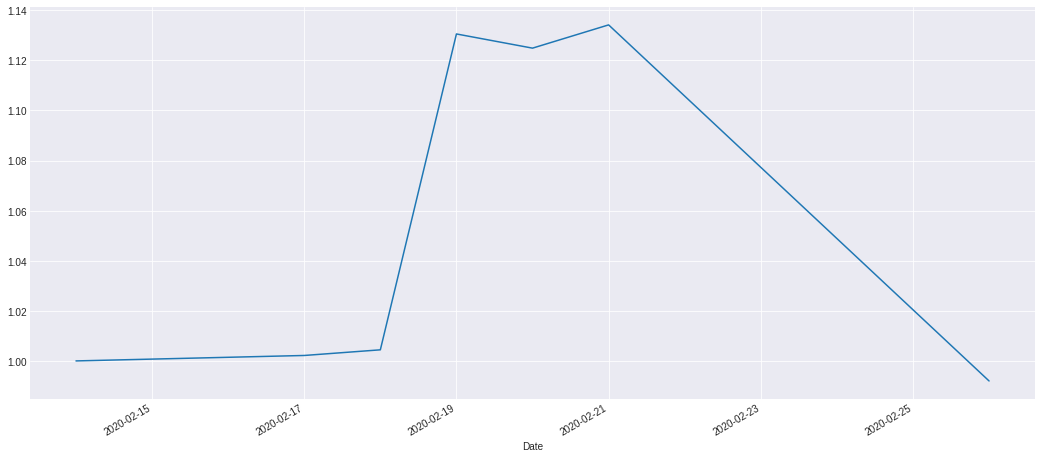

In [ ]:
carteira['vl_cota'].plot();